In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [12]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [4]:
x_data = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]
x_transformed = preprocessing.StandardScaler().fit(x_data).transform(x_data.astype(float))
y_data = df['custcat'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=4)
print('Training data: ', x_train.shape, y_train.shape)
print('Testing data: ', x_test.shape, y_test.shape)

Training data:  (800, 11) (800,)
Testing data:  (200, 11) (200,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print(y_hat)

[3 1 3 4 4 3 3 1 2 2 4 1 3 4 3 1 2 2 3 2 3 3 4 2 1 3 1 4 1 4 2 4 4 2 1 2 3
 4 1 1 1 4 3 2 3 1 4 1 2 4 3 1 2 1 3 1 3 1 1 1 1 2 4 2 4 3 1 2 2 2 1 3 3 3
 1 2 3 3 1 3 4 3 1 1 1 1 3 4 1 3 3 1 1 3 1 3 1 2 1 4 3 1 3 1 3 2 3 2 2 3 1
 1 2 4 3 1 1 2 2 1 1 1 2 4 1 1 4 4 1 1 1 3 1 2 1 3 2 1 2 1 2 3 3 2 1 1 1 4
 1 2 1 3 2 3 3 4 3 1 1 2 1 3 1 1 3 2 1 1 4 1 2 3 3 3 4 3 4 1 4 4 3 2 1 1 3
 3 1 3 3 1 3 1 2 2 3 3 1 2 2 3]


In [7]:
from sklearn import metrics
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_hat))
print('Train set accuracy: %.3f' % metrics.accuracy_score(y_train, model.predict(x_train)))
print('Test set accuracy: %.3f' % metrics.accuracy_score(y_test, y_hat))

Confusion Matrix: 
 [[21  9 16  5]
 [10 12 14  8]
 [22 11 12  9]
 [19  9 16  7]]
Train set accuracy: 0.556
Test set accuracy: 0.260


Practice

In [8]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_hat))
print('Train set accuracy: %.3f' % metrics.accuracy_score(y_train, model.predict(x_train)))
print('Test set accuracy: %.3f' % metrics.accuracy_score(y_test, y_hat))

Confusion Matrix: 
 [[26  4 17  4]
 [ 9  9 19  7]
 [19  9 17  9]
 [24 10 10  7]]
Train set accuracy: 0.495
Test set accuracy: 0.295


In [9]:
k_limit = 10
mean_accuracy = np.zeros((k_limit))
std_accuracy = np.zeros((k_limit))

for n in range(1, k_limit + 1):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    
    mean_accuracy[n-1] = np.mean(metrics.accuracy_score(y_test, y_hat))
    std_accuracy[n-1] = np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])

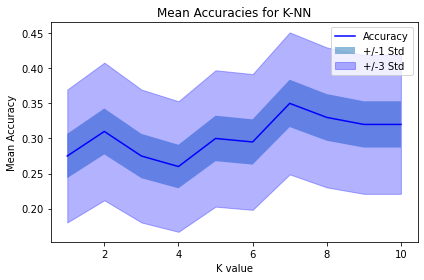

In [10]:
plt.plot(np.arange(1, k_limit + 1, 1), mean_accuracy, color='blue')
plt.title('Mean Accuracies for K-NN')
plt.fill_between(np.arange(1,k_limit + 1,1), mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha=0.5)
plt.fill_between(np.arange(1,k_limit + 1,1), mean_accuracy - 3 * std_accuracy, mean_accuracy + 3 * std_accuracy, alpha=0.3, color='blue')
plt.xlabel('K value')
plt.ylabel('Mean Accuracy')
plt.legend(('Accuracy', '+/-1 Std', '+/-3 Std'))
plt.tight_layout()
plt.show()

In [11]:
print('Best accuracy:', mean_accuracy.max(), 'with k =', mean_accuracy.argmax() + 1)

Best accuracy: 0.35 with k = 7


![title](../../../QR_codes/KNN_GA.jpg)